In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

# Загружаем данные

In [2]:
data = pd.read_csv("yeast.csv")
data

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


# Стандартизируем данные и разделяем их: 70% - обучающая выборка, 30% - тестовая

In [3]:
X = data.drop(['name'], axis=1)
y = data['name']
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<AxesSubplot:xlabel='name', ylabel='count'>

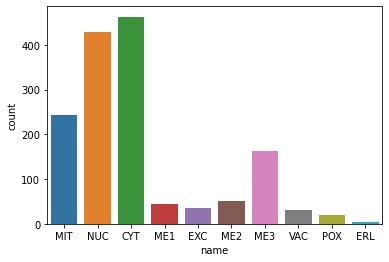

In [4]:
sns.countplot(x=data['name'])

# Производим поиск оптимальных параметров, оптимальными получились hidden_layer_sizes=31, max_iter=2000, random_state=100

In [5]:
from sklearn.model_selection import GridSearchCV
num_nrs1 = np.arange(25,40)
num_nrs2 = np.arange(2000,4000,500)
parameters = {'hidden_layer_sizes':num_nrs1, 'max_iter':num_nrs2}
clf_grid = MLPClassifier(random_state=100)

In [6]:
grid = GridSearchCV(estimator=clf_grid, param_grid=parameters, cv=4)
grid.fit(X_train, y_train)
result = grid.cv_results_['mean_test_score']
grid.best_estimator_

C:\Users\Xenia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=35, max_iter=2000, random_state=100)

# Классифицируем с помощью MLPClassifier и оптимальными параметрами

In [7]:
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(31,), max_iter=2000, random_state=100, tol=0.0001)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
mlp_cf_matrix = confusion_matrix(y_test, clf_pred)
print(mlp_cf_matrix)


[[87  0  0  0  0  0 17 28  1  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 3  0  6  2  0  0  1  0  0  0]
 [ 0  0  1  5  3  1  0  0  0  0]
 [ 3  0  3  1  1  2  1  1  0  0]
 [ 2  0  0  0  2 44  0  1  0  0]
 [23  0  0  0  3  2 46  1  1  0]
 [65  0  0  0  0  8 10 58  0  0]
 [ 1  0  0  0  0  0  2  0  2  0]
 [ 3  0  0  0  1  2  0  1  0  0]]


              precision    recall  f1-score   support

         CYT       0.47      0.65      0.54       133
         ERL       1.00      0.00      0.00         1
         EXC       0.60      0.50      0.55        12
         ME1       0.62      0.50      0.56        10
         ME2       0.09      0.08      0.09        12
         ME3       0.75      0.90      0.81        49
         MIT       0.60      0.61      0.60        76
         NUC       0.64      0.41      0.50       141
         POX       0.50      0.40      0.44         5
         VAC       1.00      0.00      0.00         7

    accuracy                           0.56       446
   macro avg       0.63      0.41      0.41       446
weighted avg       0.58      0.56      0.55       446



<AxesSubplot:>

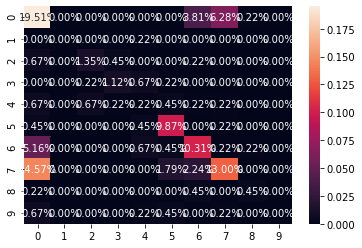

In [8]:
mlp_cls_rep = classification_report(y_test, clf_pred,zero_division=1)
print(mlp_cls_rep)
sns.heatmap(mlp_cf_matrix/np.sum(mlp_cf_matrix), annot=True, fmt='.2%')

# качество классификации неплохое

# Классификация с помощью решающего дерева

[[60  0  0  0  0  5 21 40  2  5]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 3  1  6  0  0  0  1  0  0  1]
 [ 1  1  1  4  1  1  1  0  0  0]
 [ 1  0  4  1  0  2  2  1  0  1]
 [ 2  0  0  0  1 38  4  4  0  0]
 [14  0  6  0  1  3 39 12  0  1]
 [40  0  1  0  3 11 16 66  2  2]
 [ 1  0  0  0  0  0  3  0  1  0]
 [ 4  0  0  1  2  0  0  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.48      0.45      0.46       133
         ERL       0.00      0.00      0.00         1
         EXC       0.32      0.50      0.39        12
         ME1       0.67      0.40      0.50        10
         ME2       0.00      0.00      0.00        12
         ME3       0.63      0.78      0.70        49
         MIT       0.45      0.51      0.48        76
         NUC       0.54      0.47      0.50       141
         POX       0.20      0.20      0.20         5
         VAC       0.00      0.00      0.00         7

    accuracy                           0.48       446
   macro avg       

<AxesSubplot:>

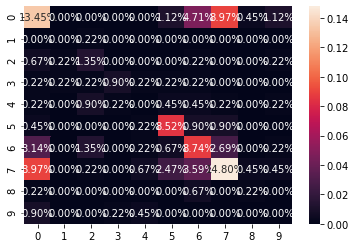

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtr_cf_matrix = confusion_matrix(y_test, dtree_pred)
dtr_cls_rep = classification_report(y_test, dtree_pred, zero_division=1)
print(dtr_cf_matrix)
print(dtr_cls_rep)
sns.heatmap(dtr_cf_matrix/np.sum(dtr_cf_matrix), annot=True, fmt='.2%')

# качество классификации сильно хуже

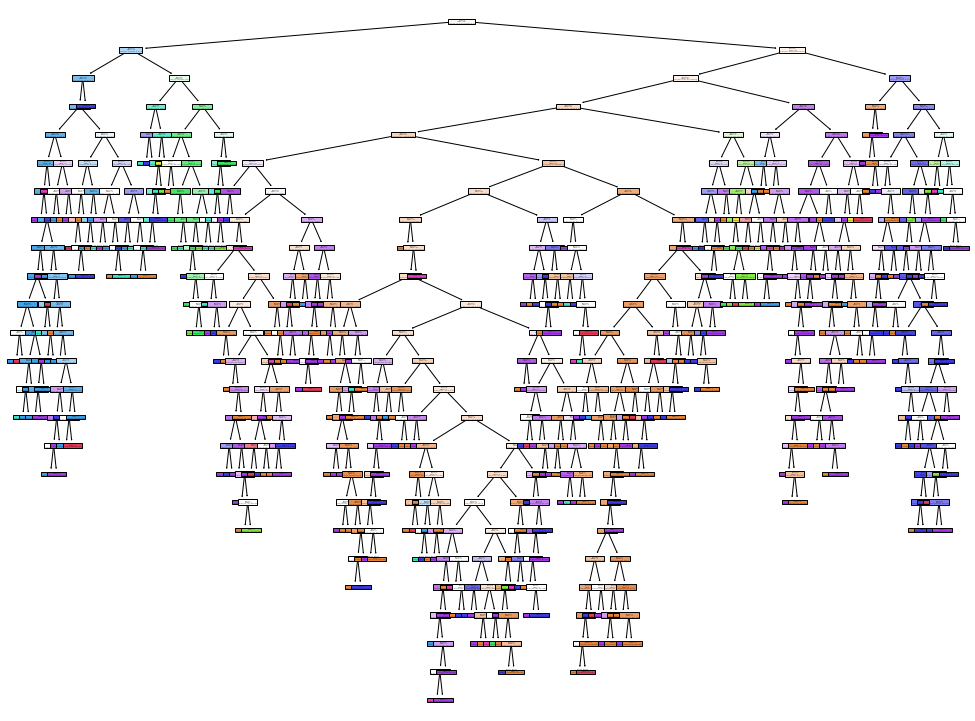

In [10]:
fig = plt.figure(figsize=(17,13))
plot_tree(dtree, 
          feature_names=list(X.columns),
          filled=True);

In [11]:
r = export_text(dtree, feature_names=list(X.columns))
print(r)

|--- alm <= 0.44
|   |--- mcg <= 0.67
|   |   |--- mit <= 0.55
|   |   |   |--- mcg <= 0.56
|   |   |   |   |--- vac <= 0.56
|   |   |   |   |   |--- pox <= 0.41
|   |   |   |   |   |   |--- mcg <= 0.24
|   |   |   |   |   |   |   |--- class: NUC
|   |   |   |   |   |   |--- mcg >  0.24
|   |   |   |   |   |   |   |--- nuc <= 0.27
|   |   |   |   |   |   |   |   |--- mit <= 0.45
|   |   |   |   |   |   |   |   |   |--- gvh <= 0.66
|   |   |   |   |   |   |   |   |   |   |--- vac <= 0.39
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- vac >  0.39
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- gvh >  0.66
|   |   |   |   |   |   |   |   |   |   |--- mit <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: ME2
|   |   |   |   |   |   |   |   |   |   |--- mit >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of d

# Классификация с помощью AdaBoost

[[64  0  1  0  1  3 14 47  1  2]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 3  0  7  1  0  0  1  0  0  0]
 [ 1  0  1  5  1  0  2  0  0  0]
 [ 0  0  4  1  0  2  4  1  0  0]
 [ 1  0  0  0  1 37  5  5  0  0]
 [14  0  7  0  2  2 39 12  0  0]
 [47  0  2  0  1 11 16 60  1  3]
 [ 1  0  0  0  0  0  3  0  1  0]
 [ 4  0  0  1  1  0  1  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.47      0.48      0.48       133
         ERL       1.00      0.00      0.00         1
         EXC       0.30      0.58      0.40        12
         ME1       0.62      0.50      0.56        10
         ME2       0.00      0.00      0.00        12
         ME3       0.67      0.76      0.71        49
         MIT       0.46      0.51      0.48        76
         NUC       0.48      0.43      0.45       141
         POX       0.33      0.20      0.25         5
         VAC       0.00      0.00      0.00         7

    accuracy                           0.48       446
   macro avg       

<AxesSubplot:>

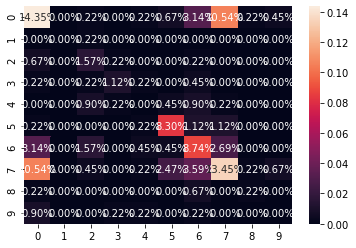

In [29]:
ada = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 200,
    learning_rate = 1,
    random_state = 100
    )
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_cf_matrix = confusion_matrix(y_test, ada_pred)
ada_cls_rep = classification_report(y_test, ada_pred, zero_division=1)
print(ada_cf_matrix)
print(ada_cls_rep)
sns.heatmap(ada_cf_matrix/np.sum(ada_cf_matrix), annot=True, fmt='.2%')

# качество классификации немного лучше решающего дерева, но хуже MLPClassifier

# Произведем поиск оптимальных параметров. Ими будут DecisionTreeClassifier(max_depth=9), 'learning_rate': 0.9, 'n_estimators': 250

In [31]:
max_depths = np.arange(1,10)
clf_ada = AdaBoostClassifier(random_state=100)
parameters = {
                 "base_estimator" : [ DecisionTreeClassifier(max_depth=depth) for depth in max_depths ],
                 "n_estimators"   : np.arange(100,1000,50),
                 "learning_rate"  : np.arange(0.1,1.1,0.1)
             }

ada_start = time()
grid_ada = GridSearchCV(clf_ada,
                    parameters, n_jobs=-1,
                    cv=4)

grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
print(grid_ada.best_params_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   n_estimators=200, random_state=100)
0.5886026136026136
{'base_estimator': DecisionTreeClassifier(max_depth=9), 'learning_rate': 1.0, 'n_estimators': 200}


# построим модель с оптимальными параметрами

[[70  0  0  0  0  1 15 47  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  1  0  3  0  0  0]
 [ 0  0  1  6  1  0  1  0  0  1]
 [ 1  0  3  1  4  1  0  2  0  0]
 [ 2  0  0  0  2 42  2  1  0  0]
 [19  0  0  0  1  1 44 11  0  0]
 [57  0  0  0  0  8 13 63  0  0]
 [ 3  0  0  0  0  0  2  0  0  0]
 [ 3  0  0  0  2  1  1  0  0  0]]
              precision    recall  f1-score   support

         CYT       0.45      0.53      0.49       133
         ERL       1.00      1.00      1.00         1
         EXC       0.67      0.67      0.67        12
         ME1       0.86      0.60      0.71        10
         ME2       0.36      0.33      0.35        12
         ME3       0.78      0.86      0.82        49
         MIT       0.54      0.58      0.56        76
         NUC       0.51      0.45      0.48       141
         POX       1.00      0.00      0.00         5
         VAC       0.00      0.00      0.00         7

    accuracy                           0.53       446
   macro avg       

<AxesSubplot:>

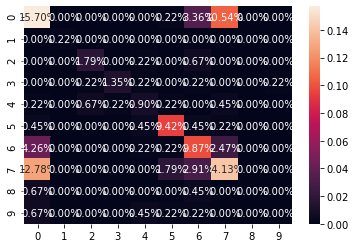

In [15]:
ada2 = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=5),
    n_estimators = 200,
    learning_rate = 0.9,
    random_state = 100
    )
ada2.fit(X_train, y_train)
ada2_pred = ada2.predict(X_test)
ada2_cf_matrix = confusion_matrix(y_test, ada2_pred)
ada2_cls_rep = classification_report(y_test, ada2_pred,zero_division=1)
print(ada2_cf_matrix)
print(ada2_cls_rep)
sns.heatmap(ada2_cf_matrix/np.sum(ada2_cf_matrix), annot=True, fmt='.2%')

# построим классификацию с помощью Бэггинга

In [16]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=250, random_state=42, n_jobs=-1)
bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)

[[97  0  0  0  0  1 11 24  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 3  0  8  0  1  0  0  0  0  0]
 [ 0  0  3  6  0  1  0  0  0  0]
 [ 2  0  3  1  2  2  1  1  0  0]
 [ 0  0  0  0  1 46  1  1  0  0]
 [25  0  0  1  2  3 44  1  0  0]
 [75  0  0  0  0 10  8 48  0  0]
 [ 3  0  0  0  0  0  2  0  0  0]
 [ 3  0  0  1  1  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.47      0.73      0.57       133
         ERL       1.00      0.00      0.00         1
         EXC       0.53      0.67      0.59        12
         ME1       0.67      0.60      0.63        10
         ME2       0.29      0.17      0.21        12
         ME3       0.72      0.94      0.81        49
         MIT       0.66      0.58      0.62        76
         NUC       0.63      0.34      0.44       141
         POX       1.00      0.00      0.00         5
         VAC       1.00      0.00      0.00         7

    accuracy                           0.56       446
   macro avg       

<AxesSubplot:>

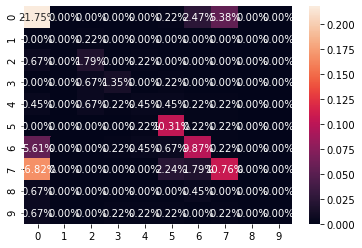

In [17]:
bag_cf_matrix = confusion_matrix(y_test, bag_pred)
bag_cls_rep = classification_report(y_test, bag_pred,zero_division=1)
print(bag_cf_matrix)
print(bag_cls_rep)
sns.heatmap(bag_cf_matrix/np.sum(bag_cf_matrix), annot=True, fmt='.2%')

In [18]:
num_est = np.arange(90,110,1)
max_depths = np.arange(1,10)
parameters = {
                'n_estimators':num_est,
                "base_estimator" : [ DecisionTreeClassifier(max_depth=depth) for depth in max_depths ],
             }
bag_grid = BaggingClassifier(random_state=100)
bag_start = time()

grid = GridSearchCV(estimator=bag_grid, param_grid=parameters, cv=4)
grid.fit(X_train, y_train)
result = grid.cv_results_['mean_test_score']
print(grid.best_estimator_)
print('Elapsed time to search  %.3f seconds' %(time()-bag_start))

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  n_estimators=101, random_state=100)
Elapsed time to search  126.523 seconds


# найдем оптимальные параметры классифкации (

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                  n_estimators=117, random_state=100)
Elapsed time to search  34.482 seconds


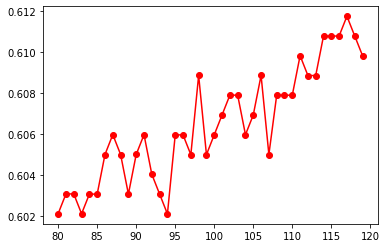

In [19]:
num_est = np.arange(80,120)
parameters = {
                'n_estimators':num_est
             }
bag_grid = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), random_state=100)
bag_start = time()

grid = GridSearchCV(estimator=bag_grid, param_grid=parameters, cv=4)
grid.fit(X_train, y_train)
result = grid.cv_results_['mean_test_score']
print(grid.best_estimator_)
print('Elapsed time to search  %.3f seconds' %(time()-bag_start))
plt.plot(num_est, result, 'o-', color="r")
plt.show()

In [20]:
print(grid.best_score_)
print(grid.best_estimator_)

0.6117389367389368
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                  n_estimators=117, random_state=100)


# Классифицируем данные с оптимальными параметрами

In [23]:
bag2 = BaggingClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=117, random_state=100, n_jobs=-1)

[[93  0  0  0  0  1 10 28  1  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 3  0  8  0  1  0  0  0  0  0]
 [ 0  0  2  7  0  1  0  0  0  0]
 [ 3  0  4  1  2  2  0  0  0  0]
 [ 0  0  0  0  1 45  2  1  0  0]
 [21  0  1  1  2  3 45  3  0  0]
 [59  0  0  0  0  8  9 65  0  0]
 [ 2  0  0  0  0  0  2  0  1  0]
 [ 3  0  0  1  1  1  0  1  0  0]]
              precision    recall  f1-score   support

         CYT       0.51      0.70      0.59       133
         ERL       1.00      0.00      0.00         1
         EXC       0.50      0.67      0.57        12
         ME1       0.70      0.70      0.70        10
         ME2       0.29      0.17      0.21        12
         ME3       0.74      0.92      0.82        49
         MIT       0.66      0.59      0.62        76
         NUC       0.66      0.46      0.54       141
         POX       0.50      0.20      0.29         5
         VAC       1.00      0.00      0.00         7

    accuracy                           0.60       446
   macro avg       

<AxesSubplot:>

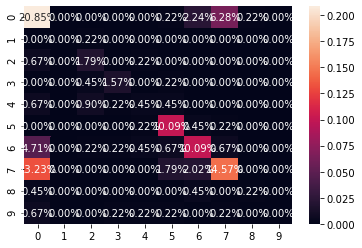

In [24]:
bag2.fit(X_train, y_train)
bag2_pred = bag2.predict(X_test)
bag2_cf_matrix = confusion_matrix(y_test, bag2_pred)
bag2_cls_rep = classification_report(y_test, bag2_pred,zero_division = 1)
print(bag2_cf_matrix)
print(bag2_cls_rep)
sns.heatmap(bag2_cf_matrix/np.sum(bag2_cf_matrix), annot=True, fmt='.2%')

# Качество не сильно, но повысилось